### Experimenting with RDkit 

In [1]:
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Descriptors 
from rdkit.Chem import AllChem 
from rdkit import DataStructs
import numpy as np 
from rdkit.Chem import MolFromInchi
from rdkit.Chem import rdMolDescriptors
import pubchempy


## Convering SMILES to molecules 
This process is done computationally where RDKit follows a certain rule to generate molecule. It's a combination of SMILES string parsing, error handling, and etc. It's not as simple as a look up table. 
-  RDKit supports plotting of the chemical formula, but this sometimes is not correct 
-  RDKit generates moleculuar formula along from SMILES strings

**Reading molecules from SMILES strings** and examples with omitted Hydrogen bonds 

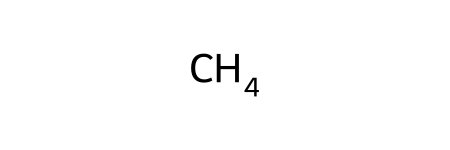

In [10]:
methane= Chem.MolFromSmiles("C")
methane 

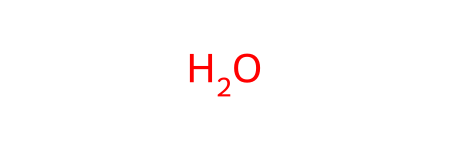

In [26]:
water= Chem.MolFromSmiles("O")
water 

Failed Plotting of RDKit, but it can still get the chemical formula correct 

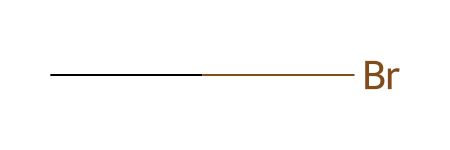

In [21]:
bromemethane= Chem.MolFromSmiles("CBr")
bromemethane

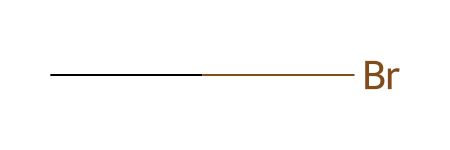

In [ ]:
# attempt using IUPAC name 
bro_2 = MolFromInchi("InChI=1S/CH3Br/c1-2/h1H3")
bro_2

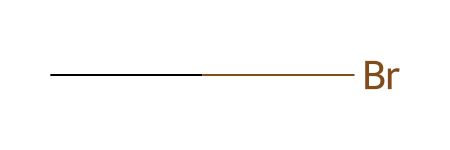

In [ ]:
# explicitly adding hydrogen bonding
bro_3= Chem.MolFromSmiles("[CH3]Br")
bro_3 

In [ ]:
# we can verify the formula of generated molecules
formula = rdMolDescriptors.CalcMolFormula(bromemethane)
print(formula)

CH3Br


CHN


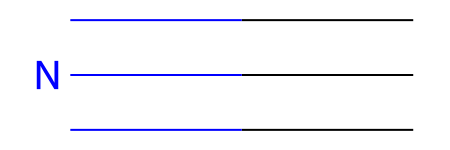

In [28]:
hydrocyanic_acid= Chem.MolFromSmiles("C#N")
Draw.MolToImage(hydrocyanic_acid)
print(rdMolDescriptors.CalcMolFormula(hydrocyanic_acid))
hydrocyanic_acid

**Molecule Representations from SMILES strings might not be generated correctly, but the  chemical formulas are detected correctly**

In [ ]:
results= pubchempy.get_compounds("C#N", namespace="smiles")
results[0]

'CHN'

### RDKit with different SMILES representations 
Does RDKit recognize different SMILES representations as the same molecule? 

2-amino-3-phenylpropanoic acid


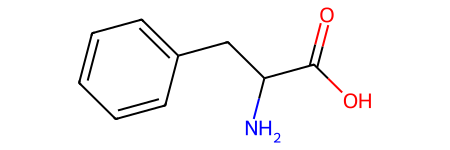

In [ ]:
# canonical representations 
phenylalanine= Chem.MolFromSmiles("C1=CC=C(C=C1)CC(C(=O)O)N")
print(pubchempy.get_compounds("C1=CC=C(C=C1)CC(C(=O)O)N", namespace="smiles")[0].iupac_name)
phenylalanine

(2S)-2-amino-3-phenylpropanoic acid


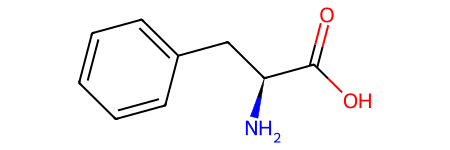

In [7]:
phenylalanine_2= Chem.MolFromSmiles("C1=CC=C(C=C1)C[C@@H](C(=O)O)N")
print(pubchempy.get_compounds("C1=CC=C(C=C1)C[C@@H](C(=O)O)N", namespace="smiles")[0].iupac_name)
phenylalanine_2

2-aminopropanoic acid
C3H7NO2


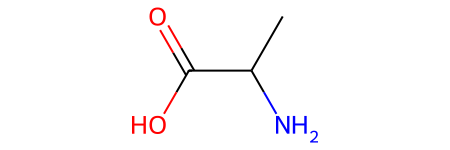

In [13]:
# canonical SMILES 
alanine_1= Chem.MolFromSmiles("CC(N)C(=O)O")
print(pubchempy.get_compounds("CC(N)C(=O)O", namespace="smiles")[0].iupac_name)
print(rdMolDescriptors.CalcMolFormula(alanine_1))
alanine_1

(2S)-2-aminopropanoic acid
C3H7NO2


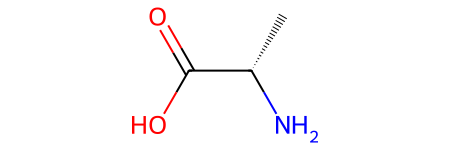

In [14]:
#isomeric SMILES 
alanine_iso = Chem.MolFromSmiles("C[C@H](N)C(=O)O")
print(pubchempy.get_compounds("C[C@H](N)C(=O)O", namespace="smiles")[0].iupac_name)
print(rdMolDescriptors.CalcMolFormula(alanine_iso))
alanine_iso

In [10]:
from SmilesEnumerator import SmilesEnumerator 
sme= SmilesEnumerator() 
for i in range (5): 
    print(sme.randomize_smiles("CC(N)C(=O)O"))

C(N)(C(O)=O)C
CC(C(=O)O)N
O=C(O)C(N)C
C(C(O)=O)(C)N
C(O)(=O)C(C)N


2-aminopropanoic acid
C3H7NO2


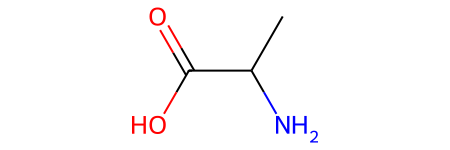

In [15]:
# regular SMILES 
alanine_3= Chem.MolFromSmiles("C(N)(C(O)=O)C")
print(pubchempy.get_compounds("C(N)(C(O)=O)C", namespace="smiles")[0].iupac_name)
print(rdMolDescriptors.CalcMolFormula(alanine_3))
alanine_3

2-aminopropanoic acid
C3H7NO2


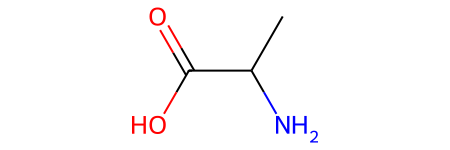

In [16]:
# regular SMILES 
alanine_4= Chem.MolFromSmiles("CC(C(=O)O)N")
print(pubchempy.get_compounds("CC(C(=O)O)N", namespace="smiles")[0].iupac_name)
print(rdMolDescriptors.CalcMolFormula(alanine_4))
alanine_4

**RDKit can recognize isomeric, canonical and regular SMILES of the molecule**

## Descriptors in RDKit 
Descriptors is a tool that allows us to access molecular information about the atom/molecule, such as the molecular weight, number of hydrogen bond acceptor/donors, log P values, etc.  
[full list](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)  
- Similar with {MolFromSmiles}, the Descriptors functions are function based and calculated based on the molecule. It is not from a lookup table as well.  

In [17]:
from rdkit.Chem import Descriptors

Sample test. In certain cases, the Descriptor doesn't match for all molecules generated from different SMILES representations. This could be caused by the way these molecules are generated from {MolFromSmiles} method. 

In [19]:
print("Information for 2-aminopropanoic acid")
print("Canonical molecule Log P value: ", Descriptors.MolLogP(alanine_1))
print("Isomeric molecule Log P value: ", Descriptors.MolLogP(alanine_iso))
print("Generic molecule Log P value: ", Descriptors.MolLogP(alanine_3))

Information for 2-aminopropanoic acid
Canonical molecule Log P value:  -0.5817999999999999
Isomeric molecule Log P value:  -0.5817999999999999
Generic molecule Log P value:  -0.5818000000000003


These molecular information can be used at different applications, such as testing Lipiski's Rule of 5 

In [46]:
mol = Chem.MolFromSmiles('CC(=O)Nc1ccc(O)cc1')  # e.g. Paracetamol

# Ro5 descriptors
MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

True


# Substructures 
We can also obtain/look up substructures of two molecules with RDKit. (We can compare two molecules at a time)

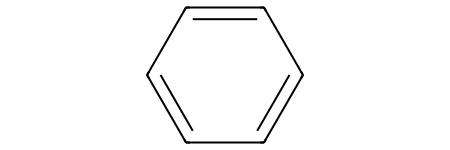

In [22]:
benzene = Chem.MolFromSmiles("c1ccccc1")
benzene 

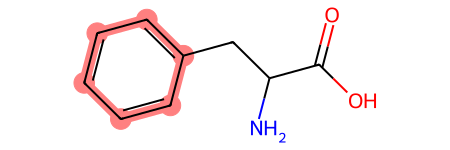

In [23]:
matches = phenylalanine.GetSubstructMatches(benzene)
phenylalanine

In [24]:
matches

((0, 1, 2, 3, 4, 5),)